# LU Decomposition

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Implementation

The function [`scipy.linalg.lu`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html) computes the LU decomposition *with partial pivoting* which is different than the LU decomposition we consider. So let's write our own Python function called `lu` to compute the LU decomposition. The function `lu` returns $L=I$ and $U=A$ with a warning message if the LU decomposition of $A$ does not exist.

In [2]:
def lu(A):
    "Compute LU decomposition of matrix A."
    m,n = A.shape
    L = np.eye(m)
    U = A.copy()
    # Keep track of the row index of the pivot entry
    pivot = 0
    for j in range(0,n):
        # Check if the pivot entry is 0
        if U[pivot,j] == 0:
            if np.any(U[pivot+1:,j]):
                # LU decomposition does not exist if entries below 0 pivot are nonzero
                print("LU decomposition for A does not exist.")
                return np.eye(m),A
            else:
                # All entries below 0 pivot are 0 therefore continue to next column
                # Row index of pivot remains the same
                continue
        # Use nonzero pivot entry to create 0 in each entry below
        for i in range(pivot+1,m):
            c = -U[i,j]/U[pivot,j]
            U[i,:] = c*U[pivot,:] + U[i,:]
            L[i,pivot] = -c
        # Move pivot to the next row
        pivot += 1
    return L,U

Let's verify our function works:

In [3]:
A = np.array([[2.,1.,1.],[2.,0.,2.],[4.,3.,4.]])
A

array([[2., 1., 1.],
       [2., 0., 2.],
       [4., 3., 4.]])

In [4]:
L,U = lu(A)

In [5]:
L

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  0.],
       [ 2., -1.,  1.]])

In [6]:
U

array([[ 2.,  1.,  1.],
       [ 0., -1.,  1.],
       [ 0.,  0.,  3.]])

In [7]:
L@U

array([[2., 1., 1.],
       [2., 0., 2.],
       [4., 3., 4.]])

Success! Let's try an example where we know the LU decomposition does not exist:

In [8]:
A = np.array([[0.,1.],[1.,0.]])

In [9]:
L,U = lu(A)

LU decomposition for A does not exist.


In [10]:
L

array([[1., 0.],
       [0., 1.]])

In [11]:
U

array([[0., 1.],
       [1., 0.]])

Now let's try an example with some zeros along the diagonal of the $U$:

In [12]:
A = np.array([[2,2,-2,4,2],[1,-1,0,2,1],[3,1,-2,6,3],[1,3,-2,2,1]])
A

array([[ 2,  2, -2,  4,  2],
       [ 1, -1,  0,  2,  1],
       [ 3,  1, -2,  6,  3],
       [ 1,  3, -2,  2,  1]])

In [13]:
L,U = lu(A)

In [14]:
L

array([[ 1. ,  0. ,  0. ,  0. ],
       [ 0.5,  1. ,  0. ,  0. ],
       [ 1.5,  1. ,  1. ,  0. ],
       [ 0.5, -1. ,  0. ,  1. ]])

In [15]:
U

array([[ 2,  2, -2,  4,  2],
       [ 0, -2,  1,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

In [16]:
L@U

array([[ 2.,  2., -2.,  4.,  2.],
       [ 1., -1.,  0.,  2.,  1.],
       [ 3.,  1., -2.,  6.,  3.],
       [ 1.,  3., -2.,  2.,  1.]])

Success! Let's do onemore example:

In [17]:
A = np.array([[1,1,-1,2,1,3],[2,5,-5,5,2,10],[-1,2,-2,-1,4,2],[3,3,-3,6,-7,5],[-4,20,-20,0,1,15]])
A

array([[  1,   1,  -1,   2,   1,   3],
       [  2,   5,  -5,   5,   2,  10],
       [ -1,   2,  -2,  -1,   4,   2],
       [  3,   3,  -3,   6,  -7,   5],
       [ -4,  20, -20,   0,   1,  15]])

In [18]:
L,U = lu(A)

In [19]:
L

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 2.,  1.,  0.,  0.,  0.],
       [-1.,  1.,  1.,  0.,  0.],
       [ 3., -0., -2.,  1.,  0.],
       [-4.,  8.,  1.,  3.,  1.]])

In [20]:
U

array([[ 1,  1, -1,  2,  1,  3],
       [ 0,  3, -3,  1,  0,  4],
       [ 0,  0,  0,  0,  5,  1],
       [ 0,  0,  0,  0,  0, -2],
       [ 0,  0,  0,  0,  0,  0]])

In [21]:
L@U

array([[  1.,   1.,  -1.,   2.,   1.,   3.],
       [  2.,   5.,  -5.,   5.,   2.,  10.],
       [ -1.,   2.,  -2.,  -1.,   4.,   2.],
       [  3.,   3.,  -3.,   6.,  -7.,   5.],
       [ -4.,  20., -20.,   0.,   1.,  15.]])

## Example

Consider the $N$ by $N$ matrix

$$
A = 
\left[
\begin{array}{rrrrr}
2 & -1 & & & \\
-1 & 2 & -1 & & \\
& \ddots & \ddots & \ddots & \\
& & -1 & 2 & -1 \\
& & & -1 & 2 \\
\end{array}
\right]
$$

Compute the solution of the system $A \mathbf{x} = \mathbf{b}$ for

$$
\mathbf{b} = \left[ \begin{array}{r} 1 \\ \vdots \\ 1 \end{array} \right]
$$

by computing the LU decomposition and using the function `scipy.linalg.solve_triangular`.

In [22]:
N = 20
A1 = 2*np.eye(N)
A2 = np.diag(-np.ones(N-1),1)
A = A1 + A2 + A2.T

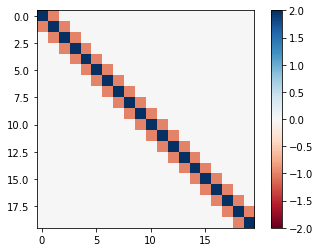

In [23]:
plt.imshow(A,cmap='RdBu'), plt.clim([-2,2])
plt.colorbar()
plt.show()

Compute the LU decomposition $A=LU$ and visualize the matrices $L$ and $U$:

In [24]:
L,U = lu(A)

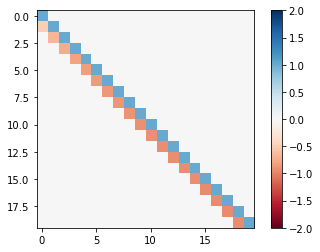

In [25]:
plt.imshow(L,cmap='RdBu'), plt.clim([-2,2]), plt.colorbar()
plt.show()

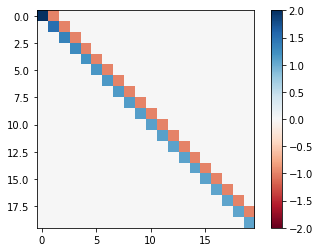

In [26]:
plt.imshow(U,cmap='RdBu'), plt.clim([-2,2]), plt.colorbar()
plt.show()

Solve the systems $L \boldsymbol{y} = \boldsymbol{b}$ and $U \boldsymbol{x} = \boldsymbol{y}$, then plot the solution $\boldsymbol{x}$:

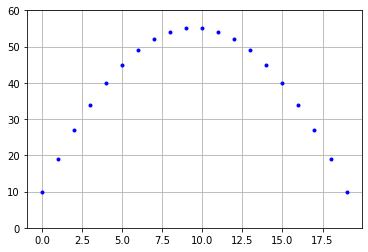

In [27]:
b = np.ones([N,1])
y = la.solve_triangular(L,b,lower=True)
x = la.solve_triangular(U,y,lower=False)
plt.plot(x,'b.'), plt.grid(True), plt.ylim([0,60])
plt.show()